In [1]:
# Problem 1
import pandas as pd
import numpy as np

startList1 = pd.read_csv('/home/aaron/jupyter/Synthego/starting_worklist (1).csv')
startList2 = pd.read_csv('/home/aaron/jupyter/Synthego/starting_worklist (1).csv')
startList1.head()

,source_barcode,source_well,volume,destination_barcode,destination_well
0,abc0192481,A1,20,d2947120012,A1
1,abc0192481,B2,20,d2947120012,B1
2,abc0192481,C4,14,d2947120012,C1
3,abc0192481,B3,15,d2947120012,D1
4,abc0192481,D5,13,d2947120012,E1


In [2]:
sourceBar = ['source_barcode', 'source_well']
destBar = ['destination_barcode', 'destination_well']
startList1.drop(columns = destBar, inplace=True)
startList2.drop(columns = sourceBar, inplace=True)

In [3]:
startList1 = startList1.set_index('source_barcode')

In [4]:
startList1.to_csv('source_List.csv', sep='\t')

In [5]:
startList2.head()

,volume,destination_barcode,destination_well
0,20,d2947120012,A1
1,20,d2947120012,B1
2,14,d2947120012,C1
3,15,d2947120012,D1
4,13,d2947120012,E1


In [6]:
startList2.to_csv('destination_List.csv', sep='\t')

In [7]:
# Problem 2
def oligoFunc(stg):
    oligoLen = sum(1 for x in stg if x.isupper())
    oligoType = ''
    if 'm' in stg and 'r' in stg:
        oligoType = 'mod RNA'
    elif 'd' in stg and 'r' in stg:
        oligoType = 'chimera'
    else:
        oligoType = 'vanilla RNA'
    return (oligoLen, oligoType)

In [8]:
oligoFunc("-Uro-Uro-Aro-Gdo-Cdo-Tdo-Ado-Aro-Cro-Gro-Gro-Uro-Ur")

(13, 'chimera')

In [9]:
oligoFunc("Ums-Ums-Ams-Gro-Cro-Uro-Aro-Aro-Cro-Gro-Gms-Ums-Um")

(13, 'mod RNA')

In [10]:
oligoFunc('-Uro-Uro-Aro-Gro-Cro-Uro-Aro-Aro-Cro-Gro-Gro-Uro-Ur')

(13, 'vanilla RNA')

# Problem 3
The provided CSV file ”synthesis data.csv” contains simulated data of 10 syntheses for several different custom sequences. This data is a smaller, simplified version of the data that the data science team at Synthego regularly collects. The data includes information about the quantity of material, overall quality, and time it took to process. These are the columns in the CSV:

• four letter sequence: a string representing the sequence (as in problem 2)

• synthesis id: an integer identifying a particular synthesis. Each synthesis has 16 sequences on it, and these sequences are synthesized and purified at the same time.

• full length product: the measured amount of the full length sequence (as a percent)

• n-1: the measured amount of a single base-sugar deletion (as a percent)

• n+1: the measured amount of a single base-sugar addition (as a percent)

• pure yield: the amount of material recovered after synthesis and purification (in nanomoles)

• other impurity: a non-specific catchall for other impurities (a ratio from 0 to 1)

• synthesis duration: the length of the synthesis in hours

• postprocessing duration: the length of postprocessing (purification) in hours
With this data, do the following in Python/pandas:

a. Use the functions from part 1 to create new columns for product type and length (if you were unable to 
complete some parts of problem 1, just do what you can.)

b. What seems to be affecting the pure yield? What other variables seem to be related to the pure yield (e.g., full length product, etc.)? Show any plots or descriptive statistics you use to explore this data and what strategies were needed to clean the data.

c. Do you notice any other unusual or interesting trends in the data? What hypotheses do you have for explaining those trends? How would you test those hypotheses with the data available? There is no right answer here as long as you can support your statements.

In [21]:
import matplotlib.pyplot as plt
syn = pd.read_csv('/home/aaron/jupyter/Synthego/synthesis_data (2).csv')

In [22]:
lst_syn = list(syn)
lst_syn

['four_letter_sequence',
 'synthesis_id',
 'n-1',
 'n+1',
 'pure_yield',
 'full_length_product',
 'other_impurity',
 'synthesis_duration',
 'postprocessing_duration']

In [12]:
keys = dict(syn).keys()
keys

dict_keys(['four_letter_sequence', 'synthesis_id', 'n-1', 'n+1', 'pure_yield', 'full_length_product', 'other_impurity', 'synthesis_duration', 'postprocessing_duration'])

In [13]:
newColName = {a:b for a,b in zip(keys, ['Seq Type', 'Synthesis ID','N-1', 'N+1', 'Pure Yield', 'FL Product', 'Impurity', 'Synthesis Duration', 'Postprocessing Duration'])}
newColName

{'four_letter_sequence': 'Seq Type',
 'synthesis_id': 'Synthesis ID',
 'n-1': 'N-1',
 'n+1': 'N+1',
 'pure_yield': 'Pure Yield',
 'full_length_product': 'FL Product',
 'other_impurity': 'Impurity',
 'synthesis_duration': 'Synthesis Duration',
 'postprocessing_duration': 'Postprocessing Duration'}

In [14]:
syn.rename(columns=newColName, inplace=True)
syn = syn.set_index('Synthesis ID')

In [15]:
# Problem 3 part a
syn.head()

,Seq Type,N-1,N+1,Pure Yield,FL Product,Impurity,Synthesis Duration,Postprocessing Duration
Synthesis ID,,,,,,,,
1,-Gms-Ums-Cms-Gro-Cro-Uro-Cro-Cro-Cro-Cro-Gro-G...,4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,-Ums-Cms-Ams-Gro-Gro-Cro-Cro-Gro-Cro-Aro-Gro-G...,8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
1,-Gms-Ums-Ams-Uro-Aro-Uro-Aro-Gro-Aro-Uro-Gro-A...,5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
1,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
1,-Cms-Ums-Cms-Cro-Cro-Uro-Cro-Cro-Cro-Aro-Gro-G...,7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


In [16]:
syn_mod = syn.groupby('Synthesis ID')[['N-1', 'N+1', 'Pure Yield', 'FL Product', 'Impurity', 'Synthesis Duration', 'Postprocessing Duration']].mean()
syn_mod.columns=['N-1', 'N+1', 'Pure Yield', 'FL Product', 'Impurity', 'Synthesis Duration', 'Postprocessing Duration']
syn_mod

,N-1,N+1,Pure Yield,FL Product,Impurity,Synthesis Duration,Postprocessing Duration
Synthesis ID,,,,,,,
1,5.764613,8.168276,6.923333,74.821515,0.007963,55.654369,35.755761
2,5.151421,8.981819,7.336004,73.771156,0.010807,56.126625,74.939431
3,NaN,NaN,NaN,NaN,NaN,12.239413,0.013144
4,5.306428,8.043510,3.210474,69.758105,0.023082,61.546239,60.160847
5,5.191692,7.599241,7.055529,74.124559,0.318804,56.237046,108.421597
6,6.716026,8.666177,6.665401,73.920012,0.015765,60.621291,68.757632
7,2.712511,4.796797,12.337595,84.401051,0.012840,20.585041,81.761638
8,NaN,NaN,-0.103367,NaN,NaN,22.262647,61.099977
9,2.789221,5.396812,11.769690,83.333135,0.025132,24.138570,53.483469


# Problem 3 part B
Based on a cursory investigation of the given information.  The synthesis type seems to have a significant impact on the pure yield.  

# Problem 3 part C
It seems that there are some other factors that may affect pure yield.  These include the post processing and length of product.

In [17]:
syn['Seq Type'] = syn['Seq Type'].apply(oligoFunc)

In [18]:
syn.head()

,Seq Type,N-1,N+1,Pure Yield,FL Product,Impurity,Synthesis Duration,Postprocessing Duration
Synthesis ID,,,,,,,,
1,"(100, mod RNA)",4.797640,6.381929,8.795529,74.553685,0.021143,55.654369,35.755761
1,"(100, mod RNA)",8.056743,8.434807,6.089592,74.963525,0.053352,55.654369,35.755761
1,"(100, mod RNA)",5.376105,10.042194,9.068502,73.169193,0.000000,55.654369,35.755761
1,"(100, mod RNA)",1.932084,10.383295,4.258049,73.053785,0.000000,55.654369,35.755761
1,"(100, mod RNA)",7.064074,4.899295,9.150096,77.128862,0.000000,55.654369,35.755761


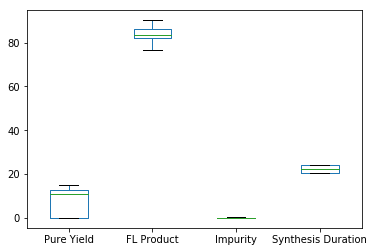

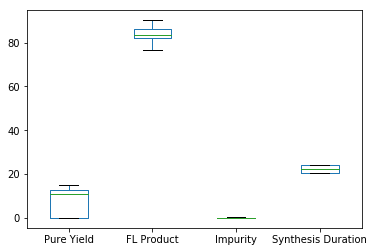

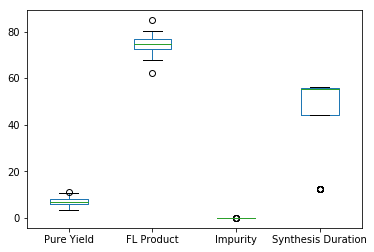

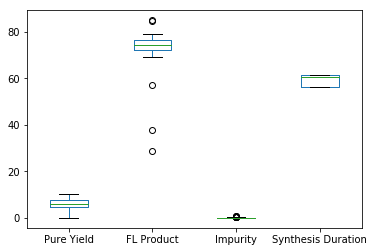

In [19]:
syn_mod = syn.groupby('Seq Type')[['Pure Yield', 'FL Product', 'Impurity', 'Synthesis Duration']]
# syn_mod = syn.groupby('Synthesis ID')[['Seq Type', 'Pure Yield', 'FL Product', 'Impurity', 'Synthesis Duration']].mean()

syn_mod.columns=['Impurity', 'Pure Yield', 'FL Product', 'Synthesis Duration']
ax = syn_mod.plo